# Boston Housing Statistics Analysis<br>
by: Huzaifi

# Prepare all required libraries

In [16]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Data Wrangling

## Gathering Data

In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col=0)

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

##  Assessing Data

In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


In [55]:
boston_df['CHAS'] = boston_df['CHAS'].astype(int)

In [56]:
boston_df['AGE'] = boston_df['AGE'].astype(int)

Change the datatype of AGE since the AGE is a discrete data type

In [57]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int32  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    int32  
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  age_group  506 non-null    object 
dtypes: float64(11), int32(2), object(1)
memory usage: 71.5+ KB


In [58]:
boston_df.nunique()

CRIM         504
ZN            26
INDUS         76
CHAS           2
NOX           81
RM           446
AGE           91
DIS          412
RAD            9
TAX           66
PTRATIO       46
LSTAT        455
MEDV         229
age_group      3
dtype: int64

In [59]:
boston_df.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
age_group    0
dtype: int64

In [60]:
boston_df.duplicated().sum()

0

## Generate Descriptive Statistics

In [61]:
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.156126,28.203316,2.00000,45.000000,77.00000,94.000000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# Data Visualization

Text(0.5, 1.0, 'Median value of owner-occupied homes')

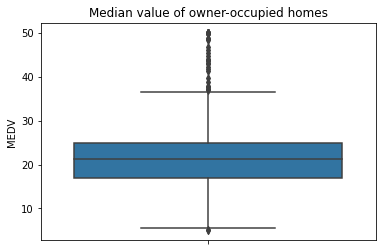

In [62]:
sns.boxplot(y='MEDV', data=boston_df)
plt.title("Median value of owner-occupied homes")

There is an outlier at MEDV above 40

Text(0.5, 1.0, 'Number of Charles River Variable')

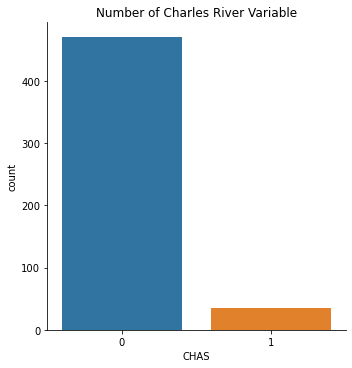

In [63]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title("Number of Charles River Variable")

Charles River Variable 0 dominates

In [64]:
boston_df["age_group"] = boston_df.AGE.apply(lambda x: "Youth" if x <= 35 else ("Seniors" if x > 70 else "Adults"))

In [65]:
boston_df[["age_group","AGE"]].sample(10)

,age_group,AGE
3,Adults,45
124,Seniors,95
423,Seniors,85
34,Seniors,96
326,Youth,28
8,Seniors,100
419,Seniors,76
329,Youth,17
262,Seniors,91
371,Seniors,100


Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

Text(0.5, 1.0, 'Median value of owner-occupied homes by age group')

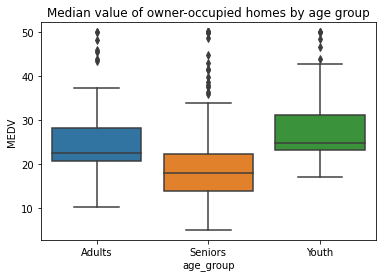

In [66]:
sns.boxplot(y='MEDV', x='age_group', data=boston_df.sort_values(by="age_group"))
plt.title("Median value of owner-occupied homes by age group")

Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

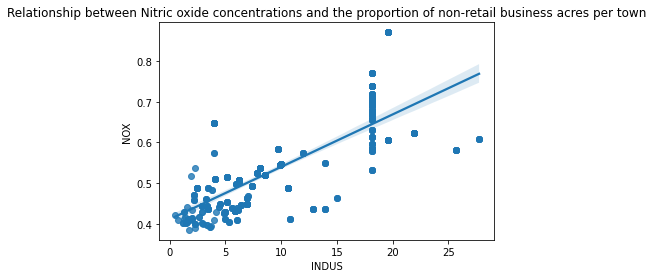

In [67]:
sns.regplot(y='NOX', x='INDUS',
                     data=boston_df)
plt.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")

The higher the INDUS, the higher the NOX

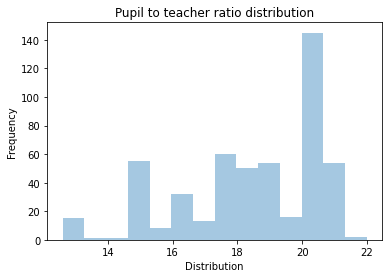

In [69]:
ax = sns.distplot(boston_df['PTRATIO'], kde = False)
ax.set(title="Pupil to teacher ratio distribution", xlabel='Distribution', ylabel='Frequency');

# Statistics Test

## 1. Is there a significant difference in the median value of houses bounded by the Charles river or not?

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in  the median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in  the median value of houses bounded by the Charles river")

$\alpha = 0.05$

In [76]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [78]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in the median value of houses bounded by the Charles river

## 2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable:
*   35 years and younger as 'Youth'
*   between 35 and 70 years as 'Adults'
*   70 years and older as 'Seniors'

In [82]:
boston_df[["age_group","AGE"]].sample(15)

,age_group,AGE
343,Adults,56
76,Seniors,74
273,Adults,51
393,Seniors,92
437,Seniors,100
26,Seniors,90
285,Youth,31
431,Seniors,94
176,Adults,47
196,Youth,34


State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

$\alpha = 0.05$

Test for equality of variance

In [83]:
scipy.stats.levene(boston_df[boston_df['age_group'] == 'Youth']['MEDV'],
                   boston_df[boston_df['age_group'] == 'Adults']['MEDV'], 
                   boston_df[boston_df['age_group'] == 'Seniors']['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.849948354793262, pvalue=0.15831354648180948)

Separate the three samples (one for each age category) into a variable each

In [84]:
Youth = boston_df[boston_df['age_group'] == 'Youth']['MEDV']
Adults = boston_df[boston_df['age_group'] == 'Adults']['MEDV'] 
Seniors = boston_df[boston_df['age_group'] == 'Seniors']['MEDV']

Run a one-way ANOVA.

In [85]:
f_statistic, p_value = scipy.stats.f_oneway(Youth, Adults, Seniors)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 37.43617590931898, P-Value: 6.976238320409294e-16


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median values of houses of each proportion of owner-occupied units built before 1940

##  3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with the proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with the proportion of non-retail business acres per town

$\alpha = 0.05$

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

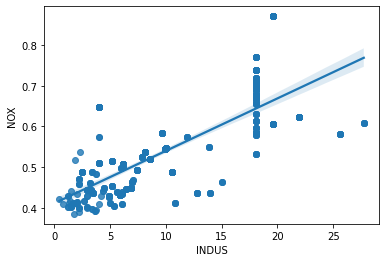

In [90]:
sns.regplot(y='NOX', x='INDUS', data=boston_df)

In [92]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209154, 7.913361061236894e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

## 4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Regression Analysis

In [96]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        14:11:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
scipy.stats.pearsonr(boston_df['MEDV'], boston_df['DIS'])

(0.24992873408590388, 1.2066117273368017e-08)

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

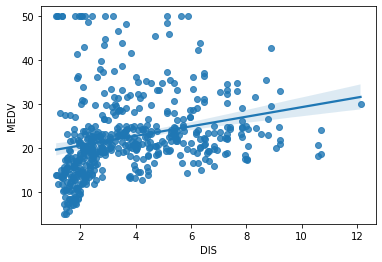

In [97]:
sns.regplot(y='MEDV', x='DIS', data=boston_df)

R-square is 0.062, R will be √0.062, correlation coefficient is 0.2499. There is a weak correlation between weighted distance to the five Boston employment centres on the median value of owner-occupied homes.<br>
So, the addition of weighted distance to the five Boston employment centres is has a weak impact on the median value of owner-occupied homes